In [1]:
# Load pickled data
import pickle
import numpy as np
import matplotlib as mpl
import cv2 
from   skimage  import exposure 
#TODO: Fill this in based on where you saved the training and testing data
from IPython.display import clear_output
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import tensorflow as tf
import matplotlib.pyplot as plt

EPOCHS = 30
BATCH_SIZE = 128
import numpy as np


training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

not_charged, y_valid = valid['features'], valid['labels']
not_charged, y_test = test['features'], test['labels']

# Charge augmentated and 

X_train = np.load('X_train_after_processing.dat.npy')
y_train =  np.load('Y_train_after_processing.dat.npy')
X_valid = np.load('X_valid_after_processing.dat.npy')
X_test = np.load('X_test_after_processing.dat.npy')


In [2]:
signlist = ['Speed limit (20km/h)',
                'Speed limit (30km/h)',
                'Speed limit(50km/h)',
                'Speed limit (60km/h)',
                'Speed limit (70km/h)',
                'Speed limit (80km/h)',
                'End of speed limit (80km/h)',
                'Speed limit (100km/h)',
                'Speed limit (120km/h)',
                'No passing',
                'No passing for vehicles over 3.5 metric tons',
                'Right-of-way at the next intersection',
                'Priority road',
                'Yield'  ,
                'Stop',
                'No vehicles',
                'Vehicles over 3.5 metric tons prohibited',
                'No entry',
                'General caution',
                'Dangerous curve to the left',
                'Dangerous curve to the right',
                'Double curve',
                'Bumpy road',
                'Slippery road',
                'Road narrows on the right',
                'Road work',
                'Traffic signals',
                'Pedestrians',
                'Children crossing',
                'Bicycles crossing',
                'Beware of ice/snow',
                'Wild animals crossing',
                'End of all speed and passing limits',
                'Turn right ahead',
                'Turn left ahead',
                'Ahead only',
                'Go straight or right',
                'Go straight or left',
                'Keep right',
                'Keep left',
                'Roundabout mandatory',
                'End of no passing',
                'End of no passing by vehicles over 3.5 metric tons']

In [3]:
from tensorflow.contrib.layers import flatten

def LeNet_modified(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 14), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(14))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
   
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
   # conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 14, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
   
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #conv2 = tf.nn.avg_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
   
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    #fc1   = tf.nn.dropout(fc1, keep_prob) #Added dropout
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob) #Added dropout

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
  #  loss = tf.nn.l2_loss(fc3_W)+tf.nn.l2_loss(fc2_W)+tf.nn.l2_loss(fc1_W)
    
    return logits#,loss

In [4]:
x = tf.placeholder(tf.float32, (None, 32, 32,1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
rate = tf.placeholder(dtype=tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [5]:
#rate = 0.001
beta = 0.001


#logits,loss = LeNet(x)
logits = LeNet_modified(x)
prediction = tf.nn.softmax(logits) # for new images
top_k_prediction = tf.nn.top_k(prediction, 5) # For new images
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits= logits, labels=one_hot_y)#+beta*loss
#cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits= logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [6]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


def evaluate(X_data, y_data,prob):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y , keep_prob: prob})
        loss     = sess.run(loss_operation , feed_dict={x: batch_x, y: batch_y , keep_prob: prob})
        predictions   = sess.run(prediction,feed_dict={x: batch_x, y: batch_y , keep_prob: prob} )
        top_k_predictions = sess.run(top_k_prediction,feed_dict={x: batch_x, y: batch_y , keep_prob: prob})
        total_accuracy += (accuracy * len(batch_x))
    return (total_accuracy / num_examples), loss,predictions,top_k_predictions

In [7]:

from scipy import misc
X_new_100limit = misc.imread('./New_traffic_signs/100limit.jpg')
X_new_stop = misc.imread('./New_traffic_signs/stop.jpg')
X_new_roundabout = misc.imread('./New_traffic_signs/Roundabout.jpg')
X_new_childencrossing = misc.imread('./New_traffic_signs/children_crossing.jpg')
X_new_yield = misc.imread('./New_traffic_signs/yield.jpg')

X_new = np.zeros((5,32,32,3))
X_new[0,:,:,:] = cv2.resize(X_new_100limit, (32,32), interpolation = cv2.INTER_AREA)
X_new[1,:,:,:] = cv2.resize(X_new_stop, (32,32), interpolation = cv2.INTER_AREA)
X_new[2,:,:,:] = cv2.resize(X_new_roundabout, (32,32), interpolation = cv2.INTER_AREA)
X_new[3,:,:,:] = cv2.resize(X_new_childencrossing, (32,32), interpolation = cv2.INTER_AREA)
X_new[4,:,:,:] = cv2.resize(X_new_yield, (32,32), interpolation = cv2.INTER_AREA)

y_new =[7,14,40,28,13]
def obtain_Y(img_in):
    out = img_in[:,:,:,0] * 0.299 + img_in[:,:,:,1] * 0.587 + img_in[:,:,:,2] * 0.114
    out = (out / 255.).astype(np.float32)
    
    for nim in range(img_in.shape[0]):
        clear_output()
        print((nim*100)/img_in.shape[0])
        out[nim,] =  exposure.equalize_hist(out[nim,])
        out[nim]  =  exposure.equalize_adapthist(out[nim])
        
    #out = (out - 128.0)/255.0
    #out = np.expand_dims(out, axis=3) 
    return out

X_out= obtain_Y(X_new)
X_new = X_out
X_new  =  np.expand_dims(X_new, axis=3) 

80.0


In [8]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')

    test_accuracy,loss,predictions,top_k_predictiones  = evaluate(X_new, y_new, prob = 1)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.800


In [9]:

def plot_predictions(top_k_predictiones,predictions,idx):
    max_pred = top_k_predictiones.indices[idx,:]
    max_probs       = np.fliplr(np.expand_dims((np.sort(predictions[idx,:])[38:43]),axis=0))
    ytitles=[signlist[max_pred[0]],signlist[max_pred[1]],signlist[max_pred[2]],signlist[max_pred[3]],signlist[max_pred[4]]]
    # Plot predictions
    plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=2)
    plt.barh(np.arange(5)+.5, max_probs[0,:], align='center')
    #plt.yticks(np.arange(5)+.5, signnames[predictions[1][index].astype(int)])
    plt.tick_params(axis='both', which='both', labelleft='off', labelright='on', labeltop='off', labelbottom='off')
    plt.yticks (np.arange(5)+.5,ytitles) 
    plt.show()

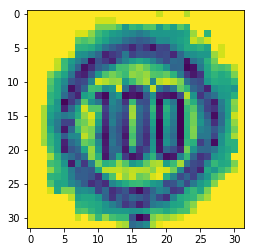

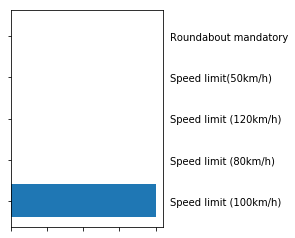

In [10]:


plt.imshow(X_out[0,:,:])
plt.show()
plot_predictions(top_k_predictiones,predictions,0)

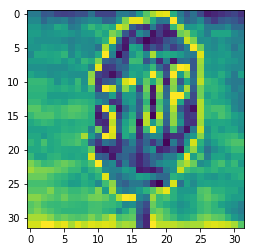

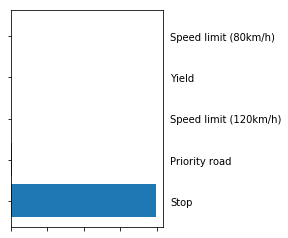

In [11]:

plt.imshow(X_out[1,:,:])
plt.show()
plot_predictions(top_k_predictiones,predictions,1)

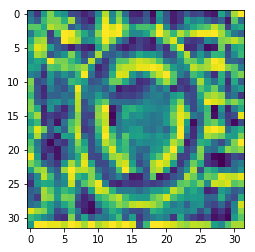

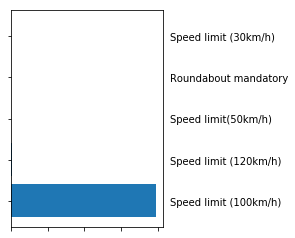

In [12]:

plt.imshow(X_out[2,:,:])
plt.show()
plot_predictions(top_k_predictiones,predictions,2)


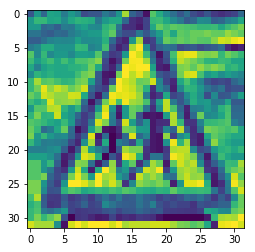

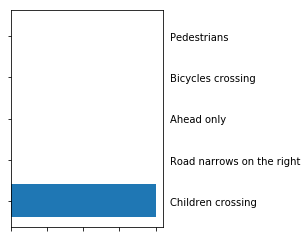

In [13]:

plt.imshow(X_out[3,:,:])
plt.show()
plot_predictions(top_k_predictiones,predictions,3)

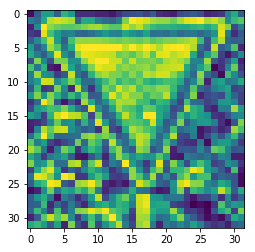

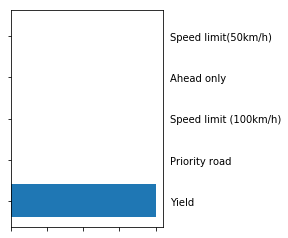

In [14]:

plt.imshow(X_out[4,:,:])
plt.show()
plot_predictions(top_k_predictiones,predictions,4)


In [15]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')

    test_accuracy,_,prediction,top_k = evaluate(X_test[0:127,], y_test[0:127,], prob = 1)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    

Test Accuracy = 0.953


In [16]:

bad_predictions = []

aux_vect = top_k.indices[:,0]-y_test[0:127,]

for idx in range(0,127):
    if aux_vect[idx]!=0:
        bad_predictions =  np.append(bad_predictions, idx)

    
bad_predictions

array([  30.,   49.,   50.,   72.,  114.,  117.])

We investigate some failing predictions in our dataset.

We can see that preprocessing methods are very agressive, and they destroy images. Being very difficult to predict. Moreover, we see that NN is too sure of its predictions. That means that we have a little problem of overfitting. 

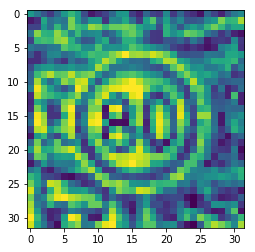

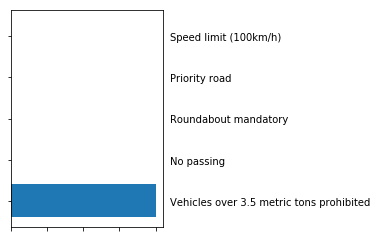

Speed limit (80km/h)


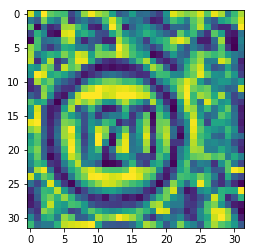

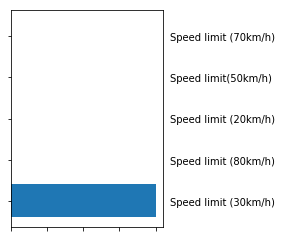

Speed limit (120km/h)


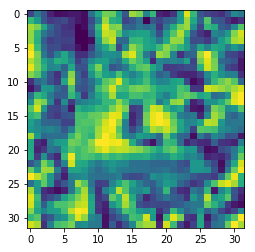

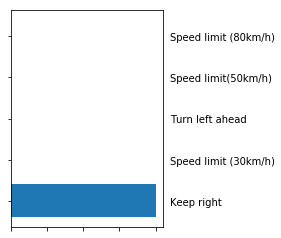

Road work


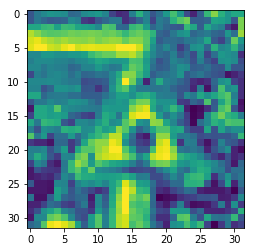

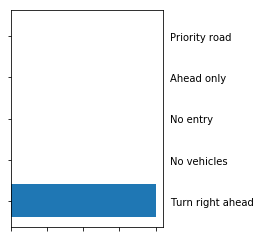

Beware of ice/snow


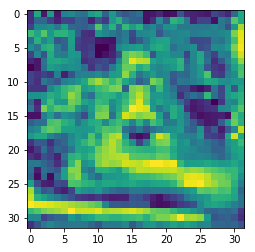

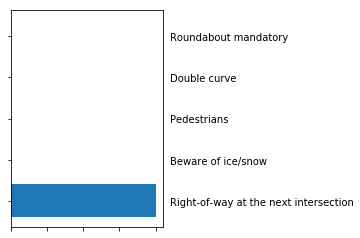

Beware of ice/snow


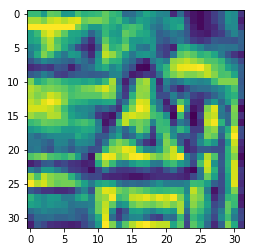

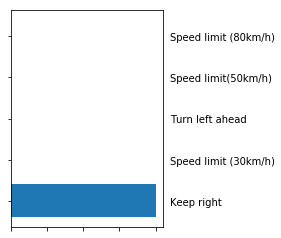

Bicycles crossing


In [17]:
for idx in range(0,bad_predictions.shape[0]):
    imagen = np.squeeze(X_test[int(bad_predictions[(idx)]),])
    plt.imshow(imagen)
    plt.show()
    plot_predictions(top_k,prediction,idx)
    print(signlist[y_test[int(bad_predictions[(idx)]),]])
    

In [18]:
int(bad_predictions[(idx)])

117